In [1]:
from IPython.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

# Twitter Sentiment Analysis
- by Kongsakun Panyang
- Email: balliolon@gmail.com
- LinkedIn: www.linkedin.com/in/kongsakun-panyang-b35029230
- GitHub: https://github.com/balliolon2

## Introduction
- This project is to practice the sentiment analysis
- Resource: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?datasetId=1520310&sortBy=voteCount
- Follow processes: Initial, Data vizualization, Text analysis, ML model selection

## Initial

In [2]:
# Libraries importation
import numpy as np # Linear algebra
import pandas as pd # data frame
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from wordcloud import WordCloud #Word visualization
import re #Regular expressions; to match strings of text such as particular characters, words, or patterns of characters
import nltk #Natural Language Processing for interactions between computers and human language
from nltk import word_tokenize #splitting a phrase, sentence, paragraph, or multiple text documents into smaller units
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Note
###### What is 'stop words'? 
- Stop words are words that are commonly used in a language & carry little meaning on their own. 
- In the context of sentiment analysis, stop words are often filtered out before processing the text data because they don't add much value in determining the sentiment.
- For example, in English, some common stop words are "the", "an", "a", "and", "in", "of", etc. 
- Removing stop words helps to reduce the size of the text data, which can improve the efficiency of the sentiment analysis process.
- The list of stop words can vary depending on the language and the specific task, but there are often pre-defined lists of stop words available in NLP libraries such as NLTK.

###### regex
- matches words
- example at below, the regular expression pattern \b[tT]\w+ matches words starting with 't' or 'T', and the re.findall function is used to find all matches in the text string.
- The \b in the pattern matches a word boundary, the [tT] matches either 't' or 'T', and the \w+ matches one or more word characters (letters, digits, or underscores)

In [3]:
# Sample text
text = "The quick brown fox jumps over the lazy dog."

# Regular expression pattern to match words starting with 't' or 'T'
pattern = r"\b[tT]\w+"

# Use the re.findall function to find all matches
matches = re.findall(pattern, text)

print(matches)

['The', 'the']


### Start coding

In [4]:
# import data sets
# I'll set header as None because the original files do not have header. Then I will set headers after input files.
val = pd.read_csv("twitter_validation.csv", header = None)
train = pd.read_csv("twitter_training.csv", header = None)

# set header
val.columns = ['id','resource','type','text']
train.columns = ['id','resource','type','text']

In [5]:
val.head(10)

,id,resource,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
6,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
7,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
8,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
9,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...


In [6]:
train.head(10)

,id,resource,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        74682 non-null  int64 
 1   resource  74682 non-null  object
 2   type      74682 non-null  object
 3   text      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1000 non-null   int64 
 1   resource  1000 non-null   object
 2   type      1000 non-null   object
 3   text      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [9]:
train.isnull().sum()

id            0
resource      0
type          0
text        686
dtype: int64

In [10]:
val.isnull().sum()

id          0
resource    0
type        0
text        0
dtype: int64

Data cleaning

In [11]:
train.dropna(inplace=True, axis=0)

Organized

In [12]:
# Create a new column, 'lower', for setting texts to lower case
train['lower'] = train['text'].str.lower()
val['lower'] = val['text'].str.lower()

In [13]:
train.head(10)

,id,resource,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,so i spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,so i spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...


In [14]:
val.head(10)

,id,resource,type,text,lower
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news - amazon boss jeff bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,@microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...","csgo matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi @eahelp i’ve had madeleine mccann in my cel...
6,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...,thank you @eamaddennfl!! \n\nnew te austin hoo...
7,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ...","rocket league, sea of thieves or rainbow six: ..."
8,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...,my ass still knee-deep in assassins creed odys...
9,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...,fix it jesus ! please fix it ! what in the wor...


In [15]:
#some texts with only numerical values
#converting to string all of them
train['lower'] = train['lower'].astype(str)
val['lower'] = val['lower'].astype(str)

In [16]:
#regex
#I'd like to use sub() 
#sub() = replacement string 
#[^A-Za-z0-9 ]+ = matches one or more characters that are not uppercase letters, lowercase letters, digits, or spaces. '^' = inverted, '+' = one or more characters should be matched
train['lower'] = train['lower'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))
val['lower'] = val['lower'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

In [17]:
train.head(10)

,id,resource,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,so i spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,so i spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...


## Data Visualization & Data Analysis
- identify the main words
- use word cloud

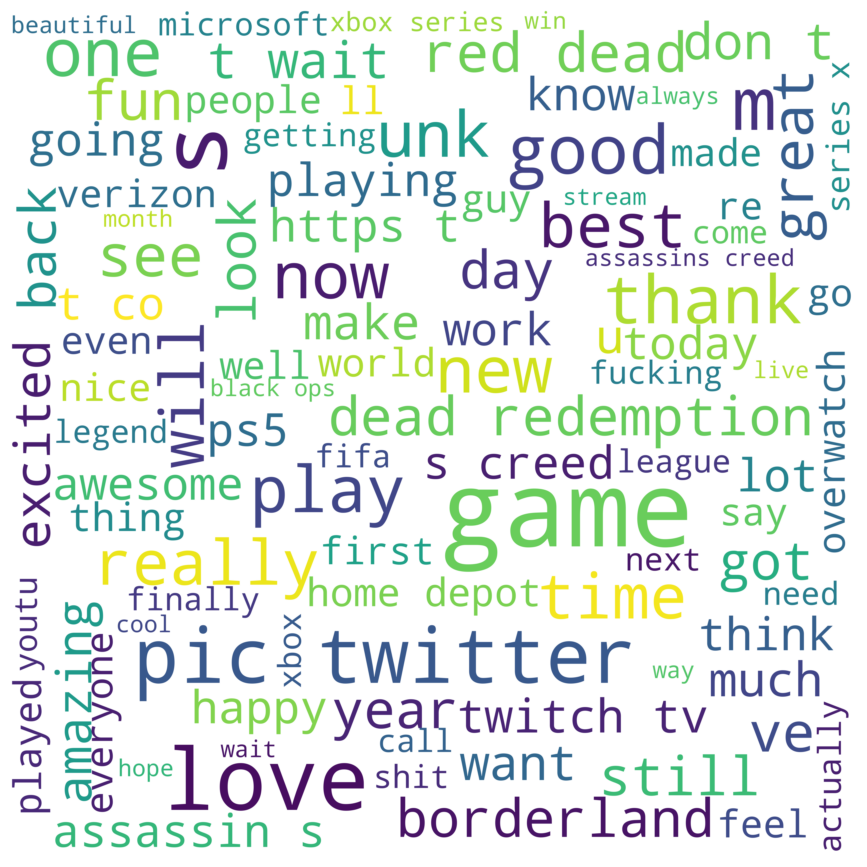

In [18]:
#Positive
word_cloud_text = ''.join(train[train["type"]=="Positive"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

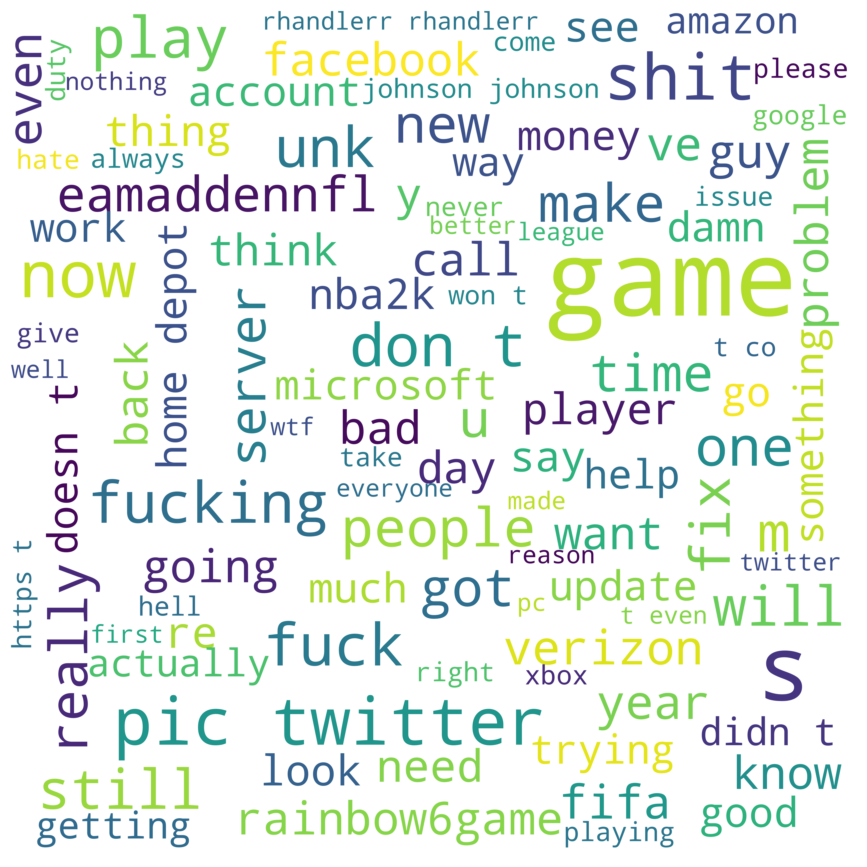

In [19]:
#Negative
word_cloud_text = ''.join(train[train["type"]=="Negative"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

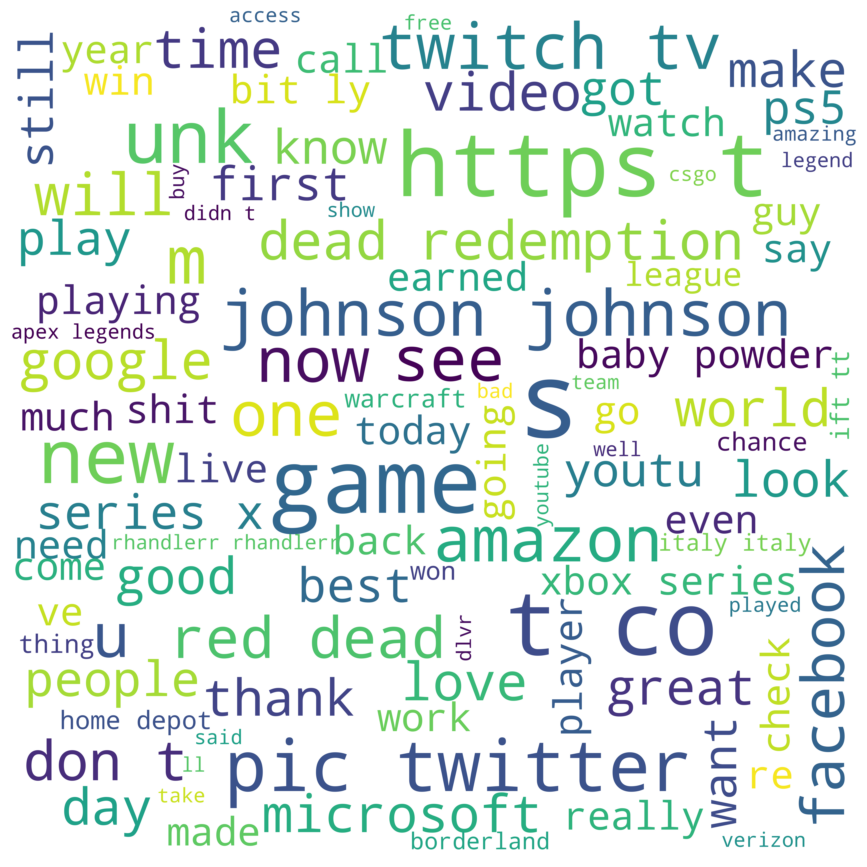

In [20]:
#Neutral
word_cloud_text = ''.join(train[train["type"]=="Neutral"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

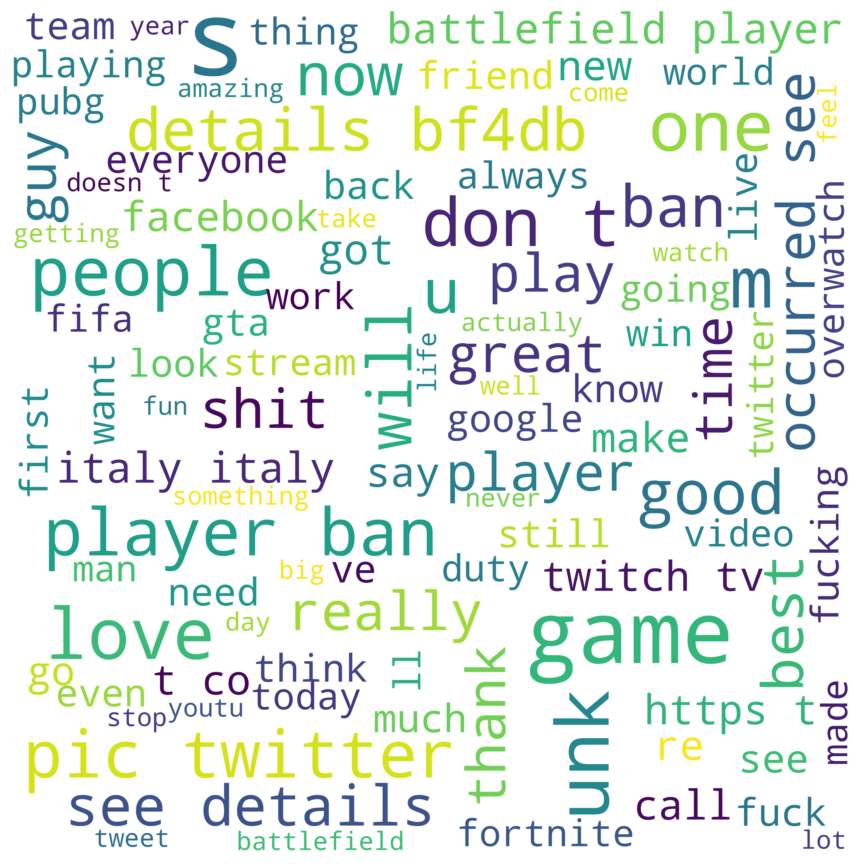

In [21]:
#Irrelevant
word_cloud_text = ''.join(train[train["type"]=="Irrelevant"].lower)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Each resource and their tweets behavior

Text(0, 0.5, 'Number of tweets')

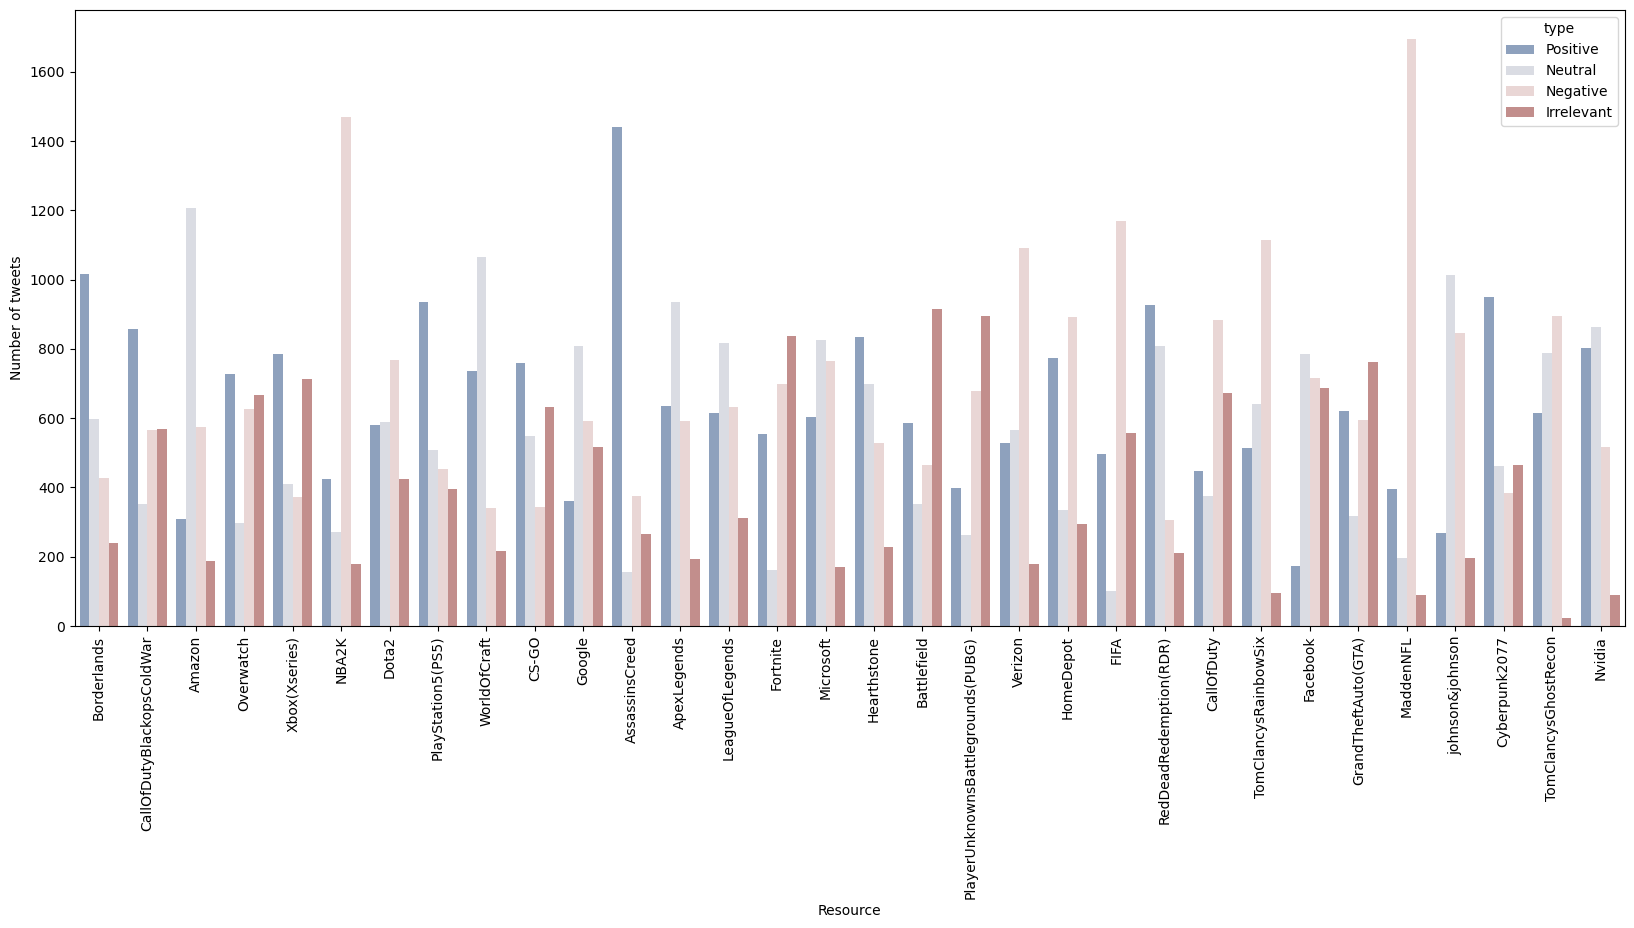

In [22]:
plt.figure(figsize=(20, 8))
sns.countplot(x='resource', data=train, hue='type', palette="vlag")
plt.xticks(rotation=90)
plt.xlabel("Resource")
plt.ylabel("Number of tweets")

According to a plot
- Assassin's Creed is the most positive number
- Madden NFL is the most negative number
- Brands do have positive tweets vividly, including, Borderland, COD Black op,PS5, Assassin's Creed, Heartstone, RDR, Cyberpunk2077
- Brands do have negative tweets vividly, including, NBA2K, Verizon, FIFA, COD, R6, MaddenNFL

##### Positive vs Neutral vs Negative vs Irrelevant

In [23]:
from collections import Counter # for count value

In [24]:
counts = Counter(train['type'])
counts

Counter({'Positive': 20655,
         'Neutral': 18108,
         'Negative': 22358,
         'Irrelevant': 12875})

Text(0, 0.5, 'Number of tweets')

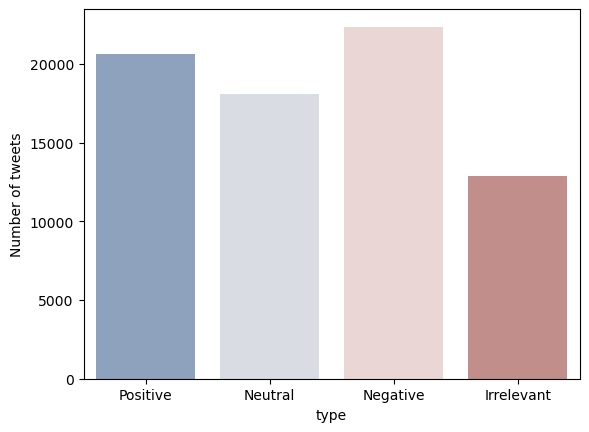

In [25]:
sns.countplot(x='type', data=train, palette="vlag")
plt.ylabel("Number of tweets")

According to this plot
- the most number of tweets is Negative
- the less number of tweets is Irrelevant

##### Heatmap

In [26]:
# sort data
train_grouped = train.groupby(['resource','type']).size().reset_index(name='count')

In [27]:
train_grouped

,resource,type,count
0,Amazon,Irrelevant,186
1,Amazon,Negative,575
2,Amazon,Neutral,1207
3,Amazon,Positive,308
4,ApexLegends,Irrelevant,192
...,...,...,...
123,Xbox(Xseries),Positive,785
124,johnson&johnson,Irrelevant,197
125,johnson&johnson,Negative,845
126,johnson&johnson,Neutral,1013


In [28]:
# create pivot table (heatmap need to use pivot table)
pivot_table = train_grouped.pivot(index='resource', columns='type', values='count')

In [29]:
pivot_table

type,Irrelevant,Negative,Neutral,Positive
resource,,,,
Amazon,186,575,1207,308
ApexLegends,192,591,936,634
AssassinsCreed,264,375,156,1439
Battlefield,915,464,351,586
Borderlands,240,426,597,1017
CS-GO,632,344,548,760
CallOfDuty,672,883,375,446
CallOfDutyBlackopsColdWar,569,566,352,856
Cyberpunk2077,465,385,462,950


Text(70.7222222222222, 0.5, 'Brand')

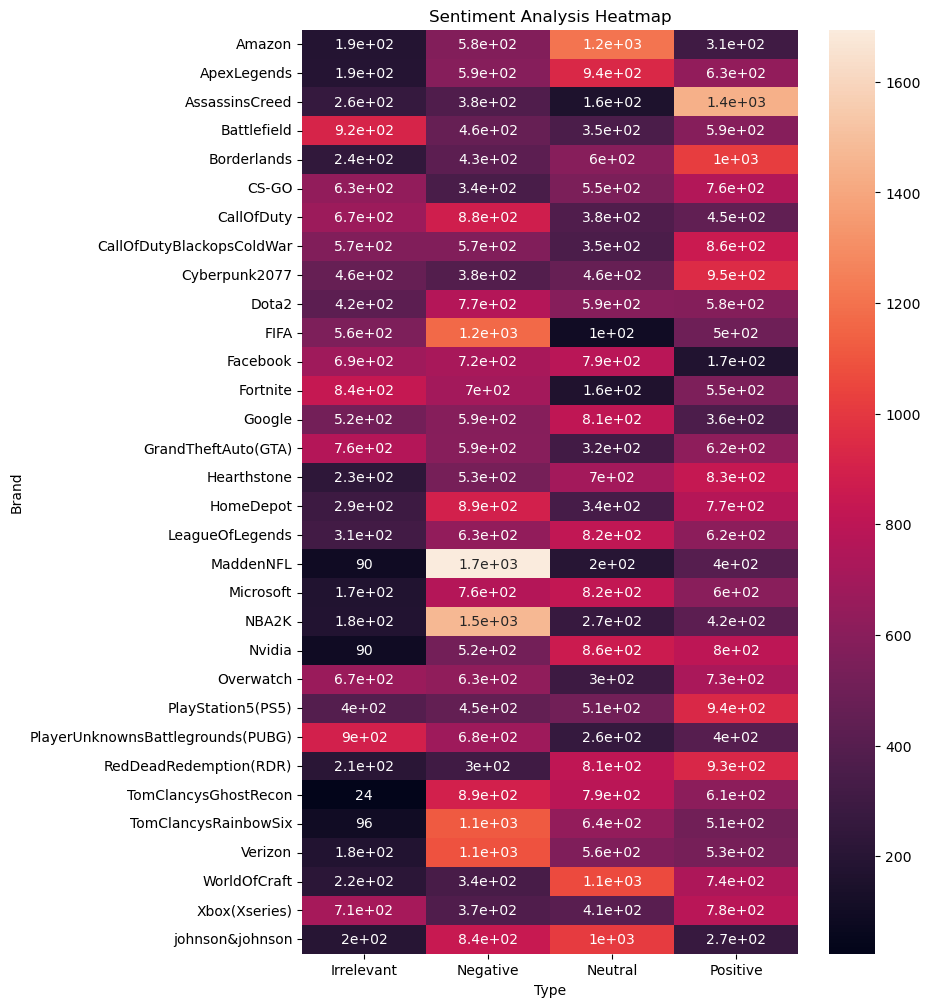

In [30]:
plt.figure(figsize=(8, 12))
sns.heatmap(pivot_table, annot=True)
plt.title('Sentiment Analysis Heatmap')
plt.xlabel('Type')
plt.ylabel('Brand')

##### Statistics

In [31]:
pivot_table.describe()

type,Irrelevant,Negative,Neutral,Positive
count,32.000000,32.000000,32.000000,32.000000
mean,402.343750,698.687500,565.875000,645.468750
std,263.474992,327.354542,293.538781,256.422029
min,24.000000,305.000000,102.000000,174.000000
25%,190.500000,461.250000,330.500000,482.750000
50%,302.500000,610.000000,556.500000,614.500000
75%,640.750000,854.500000,807.250000,789.250000
max,915.000000,1694.000000,1207.000000,1439.000000


## Text analysis
- (Note)Tokenization is the process of breaking down a text into smaller units called tokens. For example, if the text is "The cat is sitting on the mat", the tokens after tokenization would be ['The', 'cat', 'is', 'sitting', 'on', 'the', 'mat']. Tokenization is a crucial step in many NLP tasks, including sentiment analysis, as it helps to convert the raw text into a more structured form that can be analyzed and processed by machine learning algorithms.

In [32]:
# Tokenization

nltk.download('punkt') #I got an error because I did not download 'punkt'. 'punkt' it can tokenize text in any language

# Word split
tokens_text = [word_tokenize(str(word)) for word in train['lower']]
# Unique words counter
tokens_counter = [item for sublist in tokens_text for item in sublist]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
tokens_text[:3]

[['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['i',
  'am',
  'coming',
  'to',
  'the',
  'borders',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all']]

In [34]:
tokens_counter[:10]

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'murder',
 'you',
 'all']

In [35]:
print("Number of tokens: ", len(set(tokens_counter))) 

Number of tokens:  30435


We use len(set()) instead of len() because len(set()) returns the number of unique elements while len() returns all even any duplicates.

In [36]:
# Stop word
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')

In [37]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

## ML Model

#### Note
##### Bag of Words 
- is a representation of text data in NLP, where each text is represented as a collection of words, ignoring the grammar and word order but preserving the frequency of each word
- This is a last method helps to classify data to help the ML model identify proper trend

##### ML Model for sentiment analysis
- Logistic Regression: This is a simple and effective model that can be used for sentiment analysis. It models the relationship between the sentiment label and the features of the text data.

- Naive Bayes: This is a probabilistic model that can be used for sentiment analysis. It makes assumptions about the independence of the features and the distribution of the sentiment labels.

- Support Vector Machines (SVM): This is a model that can be used for sentiment analysis. It tries to find the best boundary between the positive and negative classes based on the text features.

In [38]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
) 
#CountVectorizer also convert the texts into a numerical representation
#most machine learning algorithms are designed to work with numerical data rather than text data. 

In [39]:
bow_counts

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x0000016FE0293370>)

ngram_range set to (1, 1), indicating that the analysis is performed on single words (unigrams) rather than combinations of multiple words (ngrams).

##### Train-Test splitting
- I'd like to use 80:20

In [40]:
reviews_train, reviews_test = train_test_split(train, test_size=0.2)

In [41]:
reviews_train

,id,resource,type,text,lower
71805,11100,TomClancysGhostRecon,Neutral,We are live with Ryan Breakpoint with little h...,we are live with ryan breakpoint with little h...
27460,1128,AssassinsCreed,Positive,I'm so happy out for both you guys!!!!.,i m so happy out for both you guys
48698,5959,HomeDepot,Positive,Outstanding job @ TishJones813.!!,outstanding job tishjones813
23910,4499,Google,Neutral,Smart assistant helping out while you drive? I...,smart assistant helping out while you drive i...
26056,873,AssassinsCreed,Irrelevant,9 So I have Assassin's Creed Origins on in my ...,9 so i have assassin s creed origins on in my ...
...,...,...,...,...,...
2197,2785,Borderlands,Negative,"For more than 3 weeks, 2k uk has not drawn a w...",for more than 3 weeks 2k uk has not drawn a w...
34255,6683,Fortnite,Negative,That's why Fortnite sucks,that s why fortnite sucks
58136,11568,TomClancysRainbowSix,Negative,@ Rainbow6Game This is not epic: (I was one ga...,rainbow6game this is not epic i was one ga...
66193,6935,johnson&johnson,Negative,So do I think Johnson & Johnson thinks the peo...,so do i think johnson johnson thinks the peo...


In [42]:
# Encoding
# Transform bow_counts into train-test

X_train = bow_counts.fit_transform(reviews_train['lower'])
X_test = bow_counts.transform(reviews_test['lower'])

C:\Users\Asus\anaconda3\envs\ds\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Asus\anaconda3\envs\ds\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [43]:
X_train

<59196x29047 sparse matrix of type '<class 'numpy.int64'>'
	with 650496 stored elements in Compressed Sparse Row format>

In [44]:
X_test

<14800x29047 sparse matrix of type '<class 'numpy.int64'>'
	with 160262 stored elements in Compressed Sparse Row format>

In [45]:
# Label for train-test encoding
y_train = reviews_train['type']
y_test = reviews_test['type']

In [46]:
y_train

71805       Neutral
27460      Positive
48698      Positive
23910       Neutral
26056    Irrelevant
            ...    
2197       Negative
34255      Negative
58136      Negative
66193      Negative
17808      Positive
Name: type, Length: 59196, dtype: object

In [47]:
y_test

21844     Neutral
14765    Negative
45664    Negative
37514    Negative
48651     Neutral
           ...   
44747    Negative
2399      Neutral
22228     Neutral
26732    Positive
9202     Negative
Name: type, Length: 14800, dtype: object

##### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

### ! Beware
- I did an error before
- Because I use fit_transform twice at setting X_train, X_test
- When I train a ML model, it cause ValueError

In [49]:
# Train a logistic regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Predict the sentiment of the test data
y_pred = model_lr.predict(X_test)

In [50]:
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)

Accuracy:  84.26351351351352


In [51]:
#Validation data
X_val = bow_counts.transform(val['lower'])
y_val = val['type']

In [52]:
# predict
val_pred = model_lr.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, val_pred) * 100)

Accuracy:  94.1


Logistic Regression took a time around 1 minute.

##### Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
# Train a Naive Bayes model
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

# Predict the sentiment of the test data
y_pred = model_NB.predict(X_test)

In [55]:
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)

Accuracy:  75.36486486486487


In [56]:
#Validation data prediction
val_pred = model_NB.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, val_pred) * 100)

Accuracy:  82.6


Naive Bayes took a time less than 10 seconds

##### Support Vector Machines (SVM)

In [57]:
from sklearn.svm import LinearSVC
import time

In [58]:
# Train a SVM
model_SVM = LinearSVC(max_iter=20000)

start = time.time()
model_SVM.fit(X_train, y_train)
end = time.time()

# Predict the sentiment of the test data
y_pred = model_SVM.predict(X_test)

C:\Users\Asus\anaconda3\envs\ds\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [59]:
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)

Accuracy:  86.39864864864865


In [60]:
#Validation data prediction
val_pred = model_SVM.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, val_pred) * 100)
print("Training time: ", end - start, "seconds")

Accuracy:  95.39999999999999
Training time:  221.54556274414062 seconds


Support Vector Machines (SVM) took a time more than 5 minutes and I got a convergence warning. I think I should avoid to use this one untill I found proper of max_iter

#### Try n-grams of 4 words
- because some stop words might effect to out come, I will do not get rid of stop words

In [61]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1, 4) #analysis of one word
) 

In [62]:
bow_counts

CountVectorizer(ngram_range=(1, 4),
                tokenizer=<function word_tokenize at 0x0000016FE0293370>)

In [63]:
X_train = bow_counts.fit_transform(reviews_train['lower'])
X_test = bow_counts.transform(reviews_test['lower'])

C:\Users\Asus\anaconda3\envs\ds\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [64]:
X_val = bow_counts.transform(val['lower'])

##### Logistic Regression

In [65]:
# Train a logistic regression model
model_lr = LogisticRegression(max_iter=1000)

start = time.time()
model_lr.fit(X_train, y_train)
end = time.time()

# Predict the sentiment of the test data
y_pred = model_lr.predict(X_test)

In [66]:
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)

Accuracy:  90.66891891891892


In [67]:
#Validation data
X_val = bow_counts.transform(val['lower'])
y_val = val['type']

In [68]:
# predict
val_pred = model_lr.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, val_pred) * 100)
print("Training time: ", end - start, "seconds")

Accuracy:  98.9
Training time:  771.8971436023712 seconds


Logistic Regression took a time around 3-4 minutes.

##### Naive Bayes

In [69]:
# Train a Naive Bayes model
model_NB = MultinomialNB()

start = time.time()
model_NB.fit(X_train, y_train)
end = time.time()

# Predict the sentiment of the test data
y_pred = model_NB.predict(X_test)

In [70]:
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)

Accuracy:  91.70945945945947


In [71]:
#Validation data prediction
val_pred = model_NB.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, val_pred) * 100)
print("Training time: ", end - start, "seconds")

Accuracy:  97.5
Training time:  0.3050415515899658 seconds


Naive Bayes took a time less than 10 seconds

## implement with RNN and LSTM

In [72]:
import numpy as np
from keras.utils import to_categorical, pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [73]:
X_train = reviews_train['lower']
X_test = reviews_test['lower']

In [74]:
y_train = reviews_train['type']
y_test = reviews_test['type']

#### check stop words

In [75]:
X_train.apply(lambda x: any([word in stop_words for word in x.split()])).value_counts()

True     55250
False     3946
Name: lower, dtype: int64

#### remove stop words

In [76]:
X_train = reviews_train['lower'].apply(lambda text: [word for word in text.split() if word.lower() not in stop_words])
X_test = reviews_test['lower'].apply(lambda text: [word for word in text.split() if word.lower() not in stop_words])

In [77]:
X_train[:10]

71805    [live, ryan, breakpoint, little, homies, malky...
27460                                        [happy, guys]
48698                     [outstanding, job, tishjones813]
23910    [smart, assistant, helping, drive, love, steve...
26056    [9, assassin, creed, origins, pc, really, low,...
53065    [bully, could, doomed, live, grand, theft, aut...
65683                     [incredible, speed, early, 2021]
53456    [live, society, plagued, pandemic, live, red, ...
20207                                               [much]
65345    [easports, mut, maddennfldirect, eamaddennfl, ...
Name: lower, dtype: object

#### convert sentiment to category for softmax

In [78]:
y_train = y_train.replace({"Negative": 0, "Positive": 1, "Neutral": 2, "Irrelevant": 3})
y_test = y_test.replace({"Negative": 0, "Positive": 1, "Neutral": 2, "Irrelevant": 3})

y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [79]:
y_train

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

#### convert text to sequence

In [80]:
max_features = 20000
seq_length = 30  # How long to make our word sequences
batch_size = 32

In [81]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

In [82]:
tokenizer.word_index

{'com': 1,
 'game': 2,
 'like': 3,
 '2': 4,
 'pic': 5,
 'twitter': 6,
 'get': 7,
 'one': 8,
 'good': 9,
 'play': 10,
 'love': 11,
 'really': 12,
 'new': 13,
 'unk': 14,
 'johnson': 15,
 'time': 16,
 'people': 17,
 '3': 18,
 'shit': 19,
 'see': 20,
 'co': 21,
 'best': 22,
 'still': 23,
 'facebook': 24,
 'go': 25,
 'https': 26,
 '1': 27,
 'got': 28,
 'games': 29,
 'amazon': 30,
 'great': 31,
 'even': 32,
 'playing': 33,
 'google': 34,
 'xbox': 35,
 'fucking': 36,
 'dead': 37,
 '4': 38,
 'fuck': 39,
 'microsoft': 40,
 'rhandlerr': 41,
 'please': 42,
 'verizon': 43,
 'us': 44,
 'back': 45,
 'much': 46,
 'tv': 47,
 'red': 48,
 '5': 49,
 'fifa': 50,
 'going': 51,
 'would': 52,
 'first': 53,
 'know': 54,
 'home': 55,
 'make': 56,
 'today': 57,
 'nvidia': 58,
 'pubg': 59,
 'player': 60,
 'twitch': 61,
 'day': 62,
 'borderlands': 63,
 'fun': 64,
 'gta': 65,
 'also': 66,
 'ever': 67,
 'want': 68,
 'world': 69,
 '2020': 70,
 'fix': 71,
 'bad': 72,
 'video': 73,
 'thank': 74,
 'battlefield': 75,
 

In [83]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [84]:
X_train[123]

['finally',
 'played',
 'borderlands',
 '3',
 'open',
 'game',
 'play',
 'great',
 'almost',
 'guns',
 'feel',
 'fun',
 'never',
 'felt',
 'like',
 'needed',
 'grind',
 'story',
 'another',
 'hand',
 'say',
 'much',
 'looking',
 'forward',
 'eventual',
 'cutscene',
 'skip']

In [85]:
sequences_train[123]

[658]

In [86]:
seq_length = max([len(seq) for seq in sequences_train])
seq_length

163

In [87]:
max_sequence_len = max([len(seq) for seq in sequences_train])
max_sequence_row = [seq for seq in sequences_train if len(seq) == max_sequence_len][0]
max_sequence_row

[12,
 79,
 940,
 2,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 20,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275,
 275]

In [88]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 29052 unique tokens.


In [89]:
X_train = pad_sequences(sequences_train, maxlen=seq_length)
X_test = pad_sequences(sequences_test, maxlen=seq_length)

In [90]:
X_train

array([[    0,     0,     0, ...,   128,   246,    11],
       [    0,     0,     0, ...,     0,   105,   109],
       [    0,     0,     0, ...,  3440,   416, 18170],
       ...,
       [    0,     0,     0, ...,    24,     1, 11153],
       [    0,     0,     0, ...,    17,  3899, 11821],
       [    0,     0,     0, ...,   102,    18,   300]])

In [91]:
# assert False, "Stopping the execution here"

In [92]:
input_length = 163

model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=input_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 163, 100)          2905300   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 2,986,104
Trainable params: 2,986,104
Non-trainable params: 0
_________________________________________________________________


In [93]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))

Epoch 1/5
1850/1850 [==============================] - 601s 323ms/step - loss: 0.7844 - accuracy: 0.6881 - val_loss: 0.5144 - val_accuracy: 0.8097
Epoch 2/5
1850/1850 [==============================] - 577s 312ms/step - loss: 0.3468 - accuracy: 0.8707 - val_loss: 0.3918 - val_accuracy: 0.8561
Epoch 3/5
1850/1850 [==============================] - 543s 294ms/step - loss: 0.2403 - accuracy: 0.9088 - val_loss: 0.3678 - val_accuracy: 0.8682
Epoch 4/5
1850/1850 [==============================] - 552s 299ms/step - loss: 0.1923 - accuracy: 0.9256 - val_loss: 0.3652 - val_accuracy: 0.8726
Epoch 5/5
1850/1850 [==============================] - 568s 307ms/step - loss: 0.1670 - accuracy: 0.9338 - val_loss: 0.3658 - val_accuracy: 0.8780


In [115]:
score = model.evaluate(X_test,y_test)
print("accuracy : " + str(score[1] * 100) )

463/463 [==============================] - 18s 40ms/step - loss: 0.3658 - accuracy: 0.8780
accuracy : 87.7972960472107


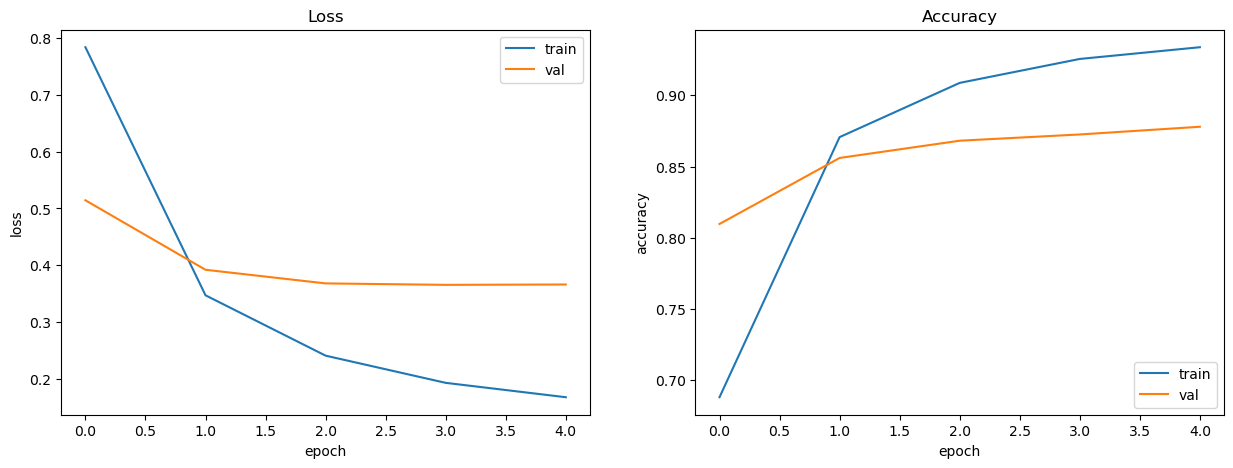

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(15,5))

ax1.set_title('Loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.plot( history.history['loss'])
ax1.plot( history.history['val_loss'])
ax1.legend(['train', 'val'], loc='upper right')


ax2.set_title('Accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.plot( history.history['accuracy'])
ax2.plot( history.history['val_accuracy'])
ax2.legend(['train', 'val'], loc='lower right')

463/463 [==============================] - 19s 41ms/step


[Text(0.5, 0, 'Predictions'), Text(0, 0.5, 'Actuals')]

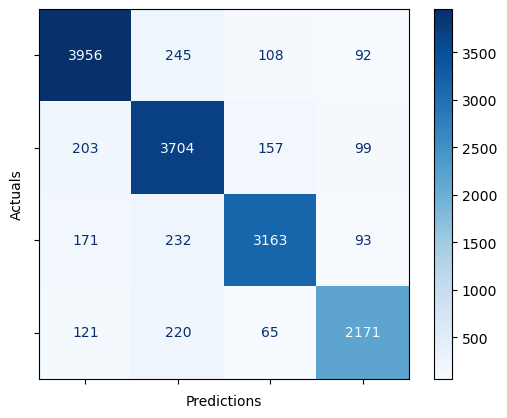

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_true, y_pred_classes) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[])
disp.plot(cmap='Blues')
disp.ax_.set(xlabel='Predictions', ylabel='Actuals')

In [109]:
y_pred = model.predict(X_test)
y_pred

463/463 [==============================] - 19s 40ms/step


array([[8.7203720e-04, 5.9886305e-03, 9.9283862e-01, 3.0057711e-04],
       [9.9666435e-01, 5.6315371e-04, 1.1667492e-03, 1.6057681e-03],
       [9.9993461e-01, 5.5356741e-06, 3.9580682e-05, 2.0293292e-05],
       ...,
       [1.6364605e-04, 4.9535593e-01, 5.0427234e-01, 2.0797514e-04],
       [1.5466005e-02, 9.8410302e-01, 3.2544366e-04, 1.0563584e-04],
       [9.9983215e-01, 2.8259199e-05, 8.7570603e-05, 5.2101488e-05]],
      dtype=float32)

In [110]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 0, ..., 2, 1, 0], dtype=int64)

In [111]:
y_pred = to_categorical(y_pred)
y_pred

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [112]:
target_names = ["Negative", "Positive", "Neutral", "Irrelevant"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.89      0.90      0.89      4401
    Positive       0.84      0.89      0.87      4163
     Neutral       0.91      0.86      0.88      3659
  Irrelevant       0.88      0.84      0.86      2577

   micro avg       0.88      0.88      0.88     14800
   macro avg       0.88      0.87      0.88     14800
weighted avg       0.88      0.88      0.88     14800
 samples avg       0.88      0.88      0.88     14800



### Conclusion

##### After analysis what I found?
- the most number of tweets is Negative (mean = 698.687500)
- the less number of tweets is Irrelevant (mean = 402.343750)
- Brands do have positive tweets vividly, including, Borderland, COD Black op,PS5, Assassin's Creed, Heartstone, RDR, Cyberpunk2077
- Brands do have negative tweets vividly, including, NBA2K, Verizon, FIFA, COD, R6, MaddenNFL
- Heatmap can show density clearly

##### After test on ML model
- n-gram of 4 words can make more accuracy than 1 word
- most effective ML model, I think it is Naive Bayes for n-gram of 4 words (Accuracy 92.28%)